#### import libraries

In [1]:
from src import get_dataloader
from src.utils import show_batch
from src.utils import plot_training_stats
from src.neural_network import custom_resnet18
from src.solver import solver
from matplotlib import pyplot as plt
import numpy as np
import torch

#### get dataloaders

In [2]:
train_loader, val_loader, test_loader = get_dataloader.main(
    DATA_DIR = "./data/256_ObjectCategories",
    TEST_RATIO = 0.1,
    VAL_RATIO = 0.1,
    RS = 42, # Random seed
    BS = 256, # Batch size
    TOTAL_MEANS = [0.485, 0.456, 0.406], # use [0.5520134568214417, 0.533597469329834, 0.5050241947174072], # for custom total means per RGB-channel
    TOTAL_STDS = [0.229, 0.224, 0.225], # use [0.03332509845495224, 0.03334072232246399, 0.0340290367603302], # total stds per RGB-channel
    RANDOM_AFFINE = 5,
    RESIZE = (224, 224),
    RANDOM_CROP = (160, 160)
)

In [3]:
train_loader.dataset.classes

['001.ak47',
 '002.american-flag',
 '003.backpack',
 '004.baseball-bat',
 '005.baseball-glove',
 '006.basketball-hoop',
 '007.bat',
 '008.bathtub',
 '009.bear',
 '010.beer-mug',
 '011.billiards',
 '012.binoculars',
 '013.birdbath',
 '014.blimp',
 '015.bonsai-101',
 '016.boom-box',
 '017.bowling-ball',
 '018.bowling-pin',
 '019.boxing-glove',
 '020.brain-101',
 '021.breadmaker',
 '022.buddha-101',
 '023.bulldozer',
 '024.butterfly',
 '025.cactus',
 '026.cake',
 '027.calculator',
 '028.camel',
 '029.cannon',
 '030.canoe',
 '031.car-tire',
 '032.cartman',
 '033.cd',
 '034.centipede',
 '035.cereal-box',
 '036.chandelier-101',
 '037.chess-board',
 '038.chimp',
 '039.chopsticks',
 '040.cockroach',
 '041.coffee-mug',
 '042.coffin',
 '043.coin',
 '044.comet',
 '045.computer-keyboard',
 '046.computer-monitor',
 '047.computer-mouse',
 '048.conch',
 '049.cormorant',
 '050.covered-wagon',
 '051.cowboy-hat',
 '052.crab-101',
 '053.desk-globe',
 '054.diamond-ring',
 '055.dice',
 '056.dog',
 '057.dol

#### reduce sampling to test functionality

In [5]:
train_loader.sampler.indices = train_loader.sampler.indices

In [6]:
len(train_loader)

766

In [7]:
val_loader.sampler.indices = val_loader.sampler.indices[:1000]

In [8]:
next(iter(val_loader))[1]

tensor([205,  45,  95, 184,  76,  75, 209, 256, 160, 253,  20,   3,  33, 243,
         57, 125,  16, 252,   5, 250, 189,  29, 168, 104, 224,  54, 104,  47,
        228, 180,  88,  11])

#### create test network

In [4]:
model = custom_resnet18(num_classes=257, p=0.5)

In [5]:
sol = solver(optim_args = {'lr': 0.0001})

In [6]:
%%time
sol.train(model, train_loader, val_loader, num_epochs=20, show_intermediate_steps = 20)

starting training process.

training epoch [1]
Percent: [###################################] 100% train_loss: 3.353 train_acc: 38.32 Done...
loss_train_avg: 4.433, train_acc_avg: 18.991
starting validation process
Percent: [###################################] 100% Done...
loss_val_avg: 3.349, val_acc_avg: 37.721

training epoch [2]
Percent: [###################################] 100% train_loss: 1.673 train_acc: 68.86 Done...
loss_train_avg: 2.552, train_acc_avg: 49.790
starting validation process
Percent: [###################################] 100% Done...
loss_val_avg: 2.098, val_acc_avg: 57.792

training epoch [3]
Percent: [###################################] 100% train_loss: 1.475 train_acc: 67.66 Done...
loss_train_avg: 1.551, train_acc_avg: 68.397
starting validation process
Percent: [###################################] 100% Done...
loss_val_avg: 1.567, val_acc_avg: 66.793

training epoch [4]
Percent: [###################################] 100% train_loss: 1.024 train_acc: 78.44

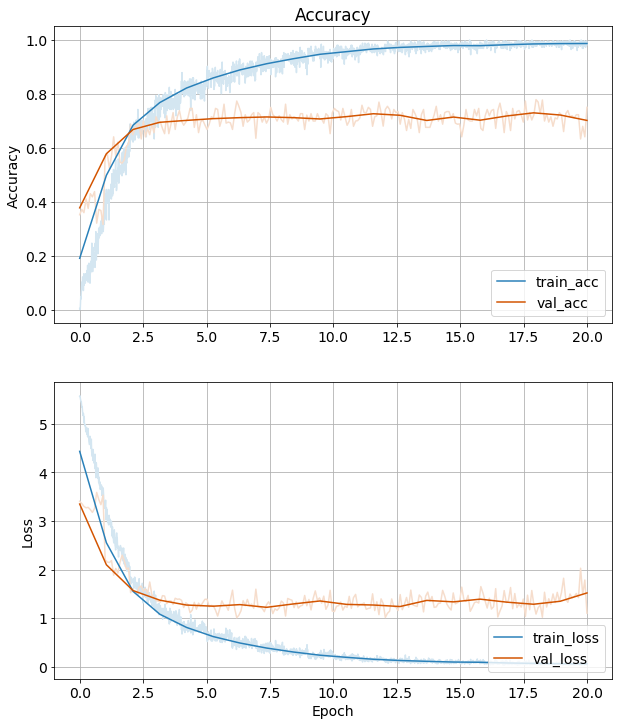

In [7]:
plt.rcParams.update({'font.size': 14})
plot_training_stats(sol)

In [8]:
path = "./models/upper_baseline/20191128_upper-baseline_40_epochs_BS_256_runtime_3h"

In [9]:
import os
os.makedirs(os.path.dirname(path), exist_ok=True)

In [10]:
torch.save(model.state_dict(), path)